In [1]:
import numpy as np
import plotly.graph_objects as go

# Rotation of cartesian coordinates into the principle axis system

In rotational spectroscopy, by convention and for simplicities sake, most operations are performed in the principle axis system of the molecule. An example is the definition of rotational Hamiltonian or the nuclear quadrupole that couples to the total angular momentum. In the principal axis system, the main rotational axis define a full orthogonal vector space. This is rooted in the definition of the Moment of Inertia tensor and its properties in linear algebra.

The Moment of Inerta tensor of an asymmetric system can be described as follows, where $i$ is each atom in the molecule with its respective mass $m_i$ and its cartesian coordinate vector $r_i = (x_i, y_i, z_i)$.

$ \hat{I} =\begin{pmatrix}
      \sum \limits _i m_i\left(y_i^2 +z_i^2\right) & - \sum \limits _i m_i x_i y_i & - \sum \limits _i m_i x_i z_i \\
      - \sum \limits _i m_i y_i x_i & \sum \limits _i m_i\left(x_i^2 +z_i^2\right) & - \sum \limits _i m_i y_i z_i\\
      - \sum \limits _i m_i z_i x_i & - \sum \limits _i m_i z_i y_i & \sum \limits _i m_i\left(x_i^2 +y_i^2\right)
    \end{pmatrix}$

It is apparent that the moment of inertia tensor is a real symmetric matrix, as it is a square matrix that is equal to its transpose $I = I^T$. In linear algebra, symmetric matrices (and their complex equivalent, Hermitian matrices) are self-adjoint operators in an orthonormal basis, meaning that observables are represented by these operators and its eigenvalues are real numbers, in this case the rotational constants. The eigenvectors are orthogonal to each other and form an orthonormal basis, the Principal Axis System (PAS).
We can diagonalize the momoment of inertia tensor by calculating the eigenvalues. The solution of the eigenvalue problem can be described by a rotation of the moment of inertia tensor into its diagonalized form. The matrix $\hat{X}$ is constructed from the eigenvectors.

$\hat{X}^{-1} \hat{I} \hat{X} = \hat{I}' $ with $\hat{I}' = \begin{pmatrix}
                                I_x & 0 & 0\\
                                0 & I_y & 0\\
                                0 & 0 & I_z
                                \end{pmatrix}$

### Setup of molecular structure in Python

Python is a good tool for linear algebra operation, therefore we will use it to transform cartesian coordinates in an arbitrary axis system into the PAS. As an example take trans-3-chlorobenzaldehyde. Here is the definition for the equilibrium cartesian coordinates obtained from a B3LYP-D3/TZVPP calculation.

In [2]:
elements = ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'O', 'H', 'Cl', 'x']
coord_rdn = np.array([[0.21363031, -0.60009846, -0.86852176],
                     [ 0.16024198,  0.52534976, -1.68792678],
                     [-0.39366712, -0.59245907,  0.37598876],
                     [-1.06366564,  0.55346116,  0.80967839],
                     [-1.12222872,  1.68401257, -0.00328261],
                     [-0.50876999,  1.65969871, -1.24671382],
                     [-1.72140446,  0.58942884,  2.1346877 ],
                     [-0.3627738,  -1.4559162,   1.02538016],
                     [ 0.73518251, -1.48231563, -1.2142234 ],
                     [ 0.63222983,  0.52507127, -2.6598256 ],
                     [-1.64083533,  2.57263686,  0.33106138],
                     [-1.73515225, -0.32724179,  2.91996296],
                     [-2.22240506,  1.54911509,  2.37408499],
                     [-0.57797517,  3.0701686,  -2.26890517]])

Of course, we also need to define the masses of each atom, for this purpose we need to choose the most abundant isotopes, as a change in isotopic mass also changes the PAS.
(Masses taken from http://physics.nist.gov/cgi-bin/Compositions/stand_alone.pl)

In [3]:
masses = {
    'H': 1.0078503223,
    'C': 12.00000000,
    'O': 15.99491461957,
    'Cl': 34.968852682,
    'x': 0.000
}

mass =  [masses[label] for label in elements[:-1]]

In [4]:
colors = {
    'H': 'grey',
    'C': 'black',
    'O': 'red',
    'Cl': 'green',
    'x': 'blue',
}
label_color = [colors[label] for label in elements]

The transformation into the PAS (or any other axis system) involves two steps: Translation and rotation. Translation moves all coordinates along a certain vector to move the origin into the center of mass of the molecule. Rotation aligns the x, y and z axis with the main rotational axis.

Below is the sturcture in a random coordinate system, its origin is marked blue with a dummy atom.

In [5]:
data = np.append(coord_rdn, [0., 0., 0.]).reshape(coord_rdn.shape[0]+1, coord_rdn.shape[1])

In [6]:
fig = go.Figure(data=[go.Scatter3d(x=data[:, 0], y=data[:, 1], z=data[:, 2],
                                   mode='markers',     marker=dict(size=10, color=label_color))])
fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=8, range=[-4,4],),
                     yaxis = dict(nticks=8, range=[-4,4],),
                     zaxis = dict(nticks=8, range=[-4,4],),),
    width=70,
    margin=dict(r=10, l=10, b=10, t=10))
fig.show()

### Moving into a center of mass system

The calculation of the center of mass and setting the origin at that point is done as follows:

$\vec{COM} = \frac{\vec{m} \cdot \hat{C}_{rdn}}{m_{tot}} $

In [7]:
com = np.dot(mass, coord_rdn) / np.sum(mass)

In [8]:
coord_com = coord_rdn - com

In [9]:
data = np.append(coord_com, [0., 0., 0.]).reshape(coord_com.shape[0]+1, coord_com.shape[1])

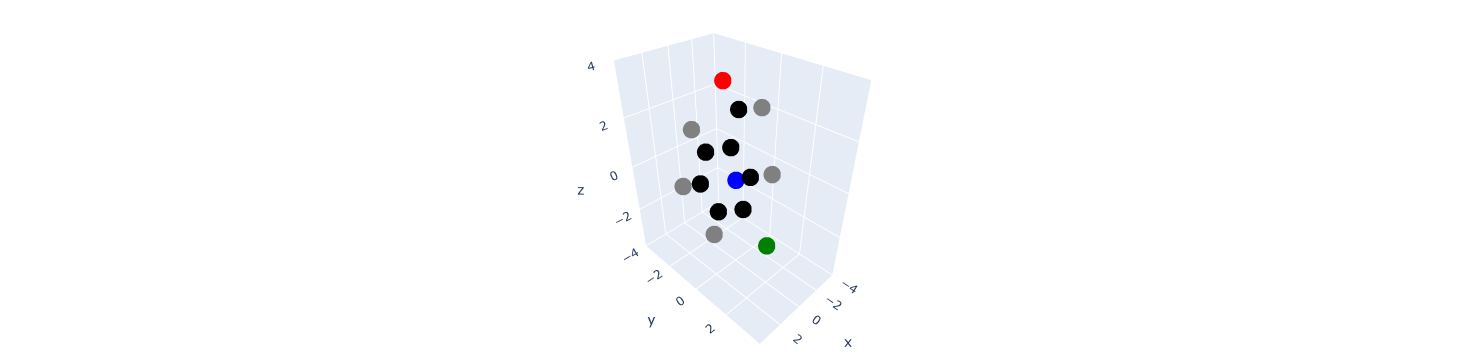

In [10]:
fig = go.Figure(data=[go.Scatter3d(x=data[:, 0], y=data[:, 1], z=data[:, 2],
                                   mode='markers',     marker=dict(size=10, color=label_color))])
fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=8, range=[-4,4],),
                     yaxis = dict(nticks=8, range=[-4,4],),
                     zaxis = dict(nticks=8, range=[-4,4],),),
    width=70,
    margin=dict(r=10, l=10, b=10, t=10))

fig.show()

### Calculation of the moment of inertia tensor and solving the eigenproblem

The most elegant way to calulate the moment of inertia tensor is by utilizing the planar moments of inerta and using an Einstein summation.

$ \hat{P} =\begin{pmatrix}
      \sum \limits _i m_i x_i^2 & \sum \limits _i m_i x_i y_i & \sum \limits _i m_i x_i z_i \\
      \sum \limits _i m_i y_i x_i & \sum \limits _i m_i y_i^2 & \sum \limits _i m_i y_i z_i\\
      \sum \limits _i m_i z_i x_i & \sum \limits _i m_i z_i y_i & \sum \limits _i m_i z_i^2
    \end{pmatrix}$



Einstein summation is a notation for contracting sums over indexed terms. The python function 

In [11]:
planar_inertia_tensor = np.einsum("ax,a,ay->xy", coord_com, mass, coord_com)
print(planar_inertia_tensor)

[[  61.31100065    0.56483319 -126.74544515]
 [   0.56483319  271.7935015  -225.60336216]
 [-126.74544515 -225.60336216  447.34826941]]


When comparing to the definition of the moments of inerta tensor above, it is apparent that the off diagonal elements of the planar moments tensor, are the negative of the off diagonal elements, also called products of inertia. The diagonal elements of both tensors are connected as follows

$I_x = \sum \limits _i m_i\left(y_i^2 +z_i^2\right) = P_{yy} + P_{zz} = \sum \limits _i m_i y_i^2 +\sum \limits _i m_i z_i^2$

In [12]:
inertia_tensor = - planar_inertia_tensor
np.fill_diagonal(inertia_tensor, planar_inertia_tensor.diagonal())
np.fill_diagonal(inertia_tensor, inertia_tensor.diagonal().sum() - inertia_tensor.diagonal())

print(inertia_tensor)

[[ 7.19141771e+02 -5.64833189e-01  1.26745445e+02]
 [-5.64833189e-01  5.08659270e+02  2.25603362e+02]
 [ 1.26745445e+02  2.25603362e+02  3.33104502e+02]]


The eigh function in numpy's linear algebra library returns the eigenvalues and eigenvectors of a Hermitian or symmetric matrix in accending order. The eigenvectors are returned in form of a 2D matrix, which can be used as a rotation matrix to diagonalize the inertia tensor. The eigenvalues can be converted to the rotational constants based on the quantum chemical calculation and used as an initial guess for experimental fits.

In [13]:
I_abc, rot_matrix = np.linalg.eigh(inertia_tensor)
rot_const = 505379.0091 / I_abc
print('Eigenvalues\nI_a = {:.4f} amu A^2, I_b = {:.4f} amu A^2, I_c = {:.4f} amu A^2'.format(*I_abc))
print('Rotational constants\nA = {:.4f} MHz, B = {:.4f} MHz, C = {:.4f} MHz'.format(*rot_const))
print('Eigenvector matrix')
print(rot_matrix)

Eigenvalues
I_a = 158.7948 amu A^2, I_b = 621.6580 amu A^2, I_c = 780.4528 amu A^2
Rotational constants
A = 3182.5918 MHz, B = 812.9535 MHz, C = 647.5459 MHz
Eigenvector matrix
[[ 0.18723984 -0.49885094 -0.84622041]
 [ 0.53255971  0.7754177  -0.33927503]
 [-0.82542195  0.3871371  -0.410857  ]]


### Rotation of cartesian coordinates

Through multipication with the rotation matrix the cartesian coordinates can be transformed into the principal axis system as shown below. When inspecting the coordinates in the PAS, it is easy to see that all z coordinates are close to zero, as chlorobenzaldehyde is planar and therefore in the AB plane of the PAS. The C rotational axis is perpendicular to the molecular plane.

In [14]:
coord_PAS = np.dot(np.linalg.inv(rot_matrix), coord_com.transpose()).transpose()
print(coord_PAS)

[[-2.20532440e-01 -2.00121464e+00  2.08542529e-08]
 [ 1.04519441e+00 -1.41911143e+00  1.29453653e-07]
 [-1.35742058e+00 -1.21054383e+00 -2.17296716e-07]
 [-1.23057699e+00  1.80149731e-01 -3.36725023e-07]
 [ 3.15796597e-02  7.71286189e-01 -2.04748402e-07]
 [ 1.15985040e+00 -3.49700218e-02  4.81385015e-09]
 [-2.42826873e+00  1.04911359e+00 -6.14277969e-07]
 [-2.34750052e+00 -1.64409143e+00 -3.37423550e-07]
 [-3.07360692e-01 -3.07931218e+00  1.00677227e-07]
 [ 1.93564764e+00 -2.03103705e+00  2.99901864e-07]
 [ 1.31746471e-01  1.84848555e+00 -3.08719073e-07]
 [-3.56720815e+00  6.49178247e-01  6.60115474e-07]
 [-2.20858954e+00  2.13587549e+00  6.84926176e-07]
 [ 2.74179105e+00  6.97528171e-01  1.03343791e-07]]


In [15]:
data = np.append(coord_PAS, [0., 0., 0.]).reshape(coord_PAS.shape[0]+1, coord_PAS.shape[1])

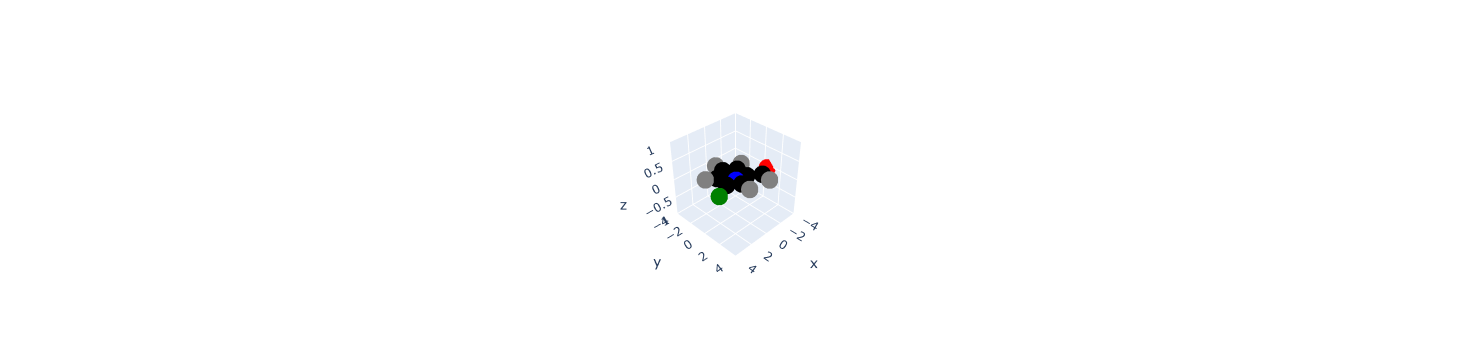

In [16]:
fig = go.Figure(data=[go.Scatter3d(x=data[:, 0], y=data[:, 1], z=data[:, 2],
                                   mode='markers',     marker=dict(size=10, color=label_color))])
fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=8, range=[-4,4],),
                     yaxis = dict(nticks=8, range=[-4,4],),
                     zaxis = dict(nticks=6, range=[-1,1],),),
    width=70,
    margin=dict(r=10, l=10, b=10, t=10))
fig.show()

If you want to try this for yourself, xyz files are supplied in this folder. You can also use Avogadro or another application of your choice for visualization.